In [3]:
!pip install joblib

3444


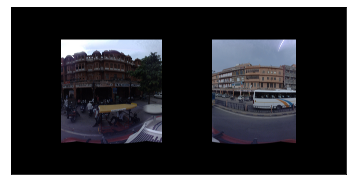

[0 0 0]
2636 5378
Black Region


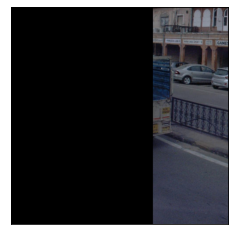

[22 19 28]
2620 3807
Distance 2143.3023585112765


KeyError: '3444'

In [12]:
import joblib
import cv2
import numpy as np

import math
import utm
import matplotlib.pyplot as plt

import os

# core idea:
# pixel_dims = actual_dims * relative_ratio

def relative_ratio(actual_dims, pixel_dims):
    return pixel_dims / actual_dims

def actual_dim_from_pixel_dim(pixel_dim, relative_ratio):
    return pixel_dim / relative_ratio


def actual_depth_from_pixel_depth(pixel_depth, pixel_height, asset_name):
    ratio = relative_ratio(ACTUAL_ASSET_DIM['flower_street_pole']['height'], pixel_height)
    actual_depth = actual_dim_from_pixel_dim(pixel_depth, ratio)
    return actual_depth

# thing_classes = ['CCTV Camera_PC500', 'Traffic_Signal_TR51', 'Sign Board_SB21', 'Bollard_BO67', 'Sign_Board_SB 1001', 'Sign Board_SB170', 'Hand Pump', 'Mobile Tower_MT_1', 'Telephone Distribution Box_EB46', 'SignBoard_SB21', 'Sign Board_SB172', 'BOREWELL', 'Electric Pole_EL11', 'Street Light_LI240', 'Sign Board_SB07', 'Sign Board_SB23', 'Sign_Board_SB153', 'Traffic Signal_TR45', 'OFC Marker_01', 'Street_Light_LI2016', 'Sign_Board_SB 1004', 'Pot_TG_3', 'Street Light_LI517', 'Street_Light_LI2014_1', 'Sign Board_SB 1003', 'Traffic_Signal_Light_TR44', 'Letter Box_LT01', 'CCTV Camera_LI8001', 'Traffic Signal Light_TR12', 'Garbage_bin_GA03', 'Traffic Signal Light_TR46', 'Electric Pole_EL8006', 'SignBoard_SB09', 'Street_Light_LI649', 'Electric Distribution Box_EB500', 'Electric Pole_EL2485', 'Traffic Signal Light_TR52', 'Zebra_Crossing', 'Sign_Board_SB172', 'Electronic Display Board_DB05', 'Sign_Board_SB8001', 'Sign Board_SB193', 'Sign Board_SB190', 'Hording_5', 'Traffic Signal Overhead_TO24', 'Electric Distribution Box_EB256', 'Traffic Signal Light_TR44', 'Sign_Board_SB170', 'Manhole_MH01', 'Electric Pole_SB153', 'Electric Distribution Box_EB08', 'Electric Distribution Box_EB110', 'Bollard_BO31', 'Tree_Deciduous', 'SignBoard_SB61', 'Sign Board_SB 1001', 'Tree Guard_TG_1', 'SignBoard_SB11', 'Sign Board_SB197', 'Electric Distribution Box_EB507', 'Rectangular Manhole', 'Bollard_BO13', 'Sign_Board_SB07', 'Traffic Signal Overhead_TO34', 'Telephone Distribution Box_EB62', 'Hording_1', 'Traffic Signal Overhead_TO28', 'Street Light_LI516', 'Electric Distribution Box_EB221', 'Manhole_MH02', 'Electric Distribution Box_EB17', 'Tree Guard_TG_2', 'Electronic Display Board_DB11', 'Traffic Signal Light_TR10', 'Sign Board_SB153', 'Sign Board_SB 1007', 'Traffic_Signal_TO28', 'Sign Board_SB196', 'Traffic_Signal_TR52', 'Transformer_EL2481', 'Sign Board_SB 1004', 'Sign_Board_SB196', 'Electric Distribution Box_EB505', 'Electric Distribution Box_EB480', 'Electric Distribution Box_EB58', 'Traffic Signal Light_TR06', 'Sign Board_SB8001', 'Street_Light_LI41', 'Street Light_LI200', 'Electric Distribution Box_EB7004', 'Electric Distribution Box_EB96', 'Traffic_Signal_TR45', 'Zebra Crossing', 'Street_Light_LI5000', 'Sign Board_SB 1006', 'Sign_Board_SB197', 'Electric Distribution Box_EB38', 'Electric Distribution Box_EB455', 'Street_Light_LI240_1', 'Garbage bin_GA03', 'Street_Light_LI617', 'Street Light_LI2014_1', 'Tree Guard_TG_4', 'CCTV Camera_PC535', 'Hoarding', 'Hording_4', 'Electric Pole_EL6005', 'Street_Light_LI200', 'Electric Distribution Box_EB02', 'Garbage bin_GA04', 'Traffic_Signal_TR50', 'Mobile_Tower_MT_1']
# ACTUAL_ASSET_DIM = {  'Street_Light_LI617':10,'Sign_Board_SB172':10,  'Street Light_LI200':10,'Letter Box_LT01':5,  'SignBoard_SB11':5,'BOREWELL':10,'Sign Board_SB153':10,  'Mobile Tower_MT_1':10,'Bollard_BO13':10,  'Electric Pole_EL11':10,'Electric Pole_SB153':10,  'Electric Pole_EL6005':10,'Street Light_LI516':5,  'Street_Light_LI649':10,'Sign_Board_SB196':5,  'Street_Light_LI240_1':10,'Street_Light_LI516':10,  'Sign_Board_SB153':5,'Electric Pole_EL2485':10,  'Sign Board_SB196':5,'Sign Board_SB 1003':5,  'Electric_Pole_EL2486':10,'Hoarding':5,  'Traffic_Signal_TR52':5,'Traffic_Signal_TR45':5,  'Traffic Signal_TR45':5,'Hording_4':10,  'Mobile_Tower_MT_1':10,'Sign_Board_SB 1004':10,  'Sign_Board_SB07':5,'Sign_Board_SB170':5,  'Street_Light_LI200':5,'Street_Light_LI2016':5,  'Street_Light_LI41':5,'Traffic_Signal_TO28':5,  'Traffic_Signal_TR50':5,'Traffic_Signal_TR51':5,  'Tree_Deciduous':10,'Zebra_Crossing':5  }



kml_src = '/home/itd/Downloads/Track_A01.csv'
lat_value = {}
lon_value = {}
center_bearing_value = {}

kml_file = open(kml_src, 'r')
line_num = 0
for line in kml_file:
    if line_num == 0:
        line_num = line_num+1
        continue
    else:
        line = (line.split(','))
        # print (line)
        lat_value[line[0]] = float(line[3])
        lon_value[line[0]]  = float(line[2])
        center_bearing_value[line[0]] = float(line[5])

# print (lat_value, lon_value, center_bearing_value)

def CalculatelatlonfromBearing(inputLat, inputLon,  bearing, depth):
    
    depthiKM = depth/1000
    
    earthDistance = depthiKM/6371.01
    brng = math.radians(bearing)

    inputLat = math.radians(inputLat)
    inputLon = math.radians(inputLon)

    lat2 = math.asin(math.sin(inputLat)*math.cos(earthDistance) + math.cos(inputLat)*math.sin(earthDistance)*math.cos(brng))
    lon2 = inputLon + math.atan2(math.sin(brng)*math.sin(earthDistance)*math.cos(inputLat),math.cos(earthDistance)-math.sin(inputLat)*math.sin(lat2))

    lon2 = math.fmod((lon2+3*math.pi),(2*math.pi)) - math.pi

    lat2 = math.degrees(lat2)
    lon2 = math.degrees(lon2)

    return lat2,lon2

def CalculateBearingfromFOV(targetPixelX, imageWidth, fov, centerBearing):
    centerPixel = imageWidth/2
    #pixelbearingRatio = 360/imageWidthPixels #1 pixel = ? heading for spherical views
    pixelbearingRatio = fov/imageWidth #for DSLRs/ Drones
    pixelDiff = targetPixelX - centerPixel
    differenceBearing = pixelDiff*pixelbearingRatio
    targetBearing =centerBearing + differenceBearing

    # print("Target Bearing: " + str(targetBearing))

    return targetBearing


def focus_pad(im, color="white"):
  H, W, C = im.shape

  h_lim_top = int(0.20*H)
  h_lim_bot = H - int(0.10*H)

  w_lim_lft = int(0.15*W)
  w_lim_rgt = W-int(0.15*W)

  h_center = H//2
  w_center = W//2

  w_mid_lft = w_center - int(0.10*w_center)
  w_mid_rgt = w_center + int(0.20*w_center)

  # margin cropped
  # im_temp = im[h_lim_top:h_lim_bot, w_lim_lft:w_lim_rgt]

  if color == "white":
    # whiten top and bottom
    im[:h_lim_top] = np.ones(im[0:h_lim_top].shape)*255
    im[h_lim_bot:] = np.ones(im[h_lim_bot:].shape)*255
    # whiten left and right
    im[:, :w_lim_lft] = np.ones(im[:, :w_lim_lft].shape)*255
    im[:, w_lim_rgt:] = np.ones(im[:, w_lim_rgt:].shape)*255
    # whiten center region
    im[:, w_mid_lft:w_mid_rgt] = np.ones(im[:, w_mid_lft:w_mid_rgt].shape)*255

  else:
    # darken top and bottom
    im[:h_lim_top] = np.zeros(im[0:h_lim_top].shape)
    im[h_lim_bot:] = np.zeros(im[h_lim_bot:].shape)
    # darken left and right
    im[:, :w_lim_lft] = np.zeros(im[:, :w_lim_lft].shape)
    im[:, w_lim_rgt:] = np.zeros(im[:, w_lim_rgt:].shape)
    # darken center region
    im[:, w_mid_lft:w_mid_rgt] = np.zeros(im[:, w_mid_lft:w_mid_rgt].shape)

  return im

def display(img):
  plt.close()
  plt.imshow(img)
  plt.xticks([], []) 
  plt.yticks([], []) 
  plt.show()


# Path to save CSV file.
csv_write = open('Vector_all_24.csv', 'w')
csv_write.write('id,lat,lon,Object,Score,ImageName\n')
feat_id = 0

image_dir = "/home/itd/Desktop/JAIPUR_ASSETS_SEGMENTATION/segline/src/store/data/Allowed_Classes/test/"
# Bin file Path.
bin_dir = '/home/itd/Desktop/JAIPUR_ASSETS_SEGMENTATION/segline/src/store/data/Allowed_Classes/prediction/eval_test/'
for bin_file in os.listdir(bin_dir):
    bin_file = bin_dir+ bin_file
    x = joblib.load(bin_file)
    

    # x[0].keys() --> dict_keys(['imgShape', 'predClasses', 'predBoxes', 'boxScores', 'imageName'])
    # x[1] --> thing_classes  
    thing_classes = x[1]
    imageWidth, imageHeight =x[0]['imgShape'][1], x[0]['imgShape'][0] #img.shape[1], img.shape[0]
    reference =  (int(imageHeight), int(imageWidth/2))
    image_id = x[0]['imageName'].split('.')[0].split('-')[-1]
    print (image_id)
    img = cv2.imread(image_dir+x[0]['imageName'])
    img = focus_pad(img.copy(), "black")
    # display(img)

    for num, box in enumerate(x[0]['predBoxes']):
        # print ("Class", x[0][0]['predClasses'])
        # print(x[0]['boxScoresdraw_instance_predictions'])
        # print ("Class Name", thing_classes[x[0]['predClasses'][num]])
        
        feat_id = feat_id +1
        targetPixelX =  int((box[0]+box[2])/2)
        targetPixelY = int(box[3])
        print (img[targetPixelY,targetPixelX])
        print (targetPixelY,targetPixelX)
        if img[targetPixelY,targetPixelX][0] == 0 and img[targetPixelY,targetPixelX][1] == 0 and img[targetPixelY,targetPixelX][2]==0:
            # print ("Black Region")
            # display(img[targetPixelY-500:targetPixelY+500,targetPixelX-500:targetPixelX+500,:])
            continue
            
        diffX, diffY = abs(targetPixelX- reference[0]), abs(targetPixelY- reference[1])

        distance = math.sqrt(diffX**2 + diffY**2)

        print ("Distance", distance)
        if diffX < 1000:
            factor = 0.15
        if diffX < 1400:
            factor = 0.40
        else:
            factor  = 0.2 #ACTUAL_ASSET_DIM[thing_classes[x[0]['predClasses'][num]]] /10
            if targetPixelX > reference[1]:
                factor = 0.4

        depth = int(distance / 100)* factor 

        centerBearing = center_bearing_value[image_id]# scrape value from kml file
        fov = 360 # fixed
        bearing  = CalculateBearingfromFOV(targetPixelX, imageWidth, fov, centerBearing)
        inputLat , inputLon = lat_value[image_id], lon_value[image_id]# scrape value from kml file
        lat, lon = CalculatelatlonfromBearing(inputLat, inputLon,  bearing, depth)
        # content to write in csv file id,lat,lon,Object,Score,ImageName
        csv_str = '{},{},{},{},{},{}\n'.format(feat_id, lat,lon, thing_classes[x[0]['predClasses'][num]], str(x[0]['boxScoresdraw_instance_predictions'][num]), x[0]['imageName'])
        csv_write.write(csv_str)


csv_write.close()
